In [1]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

In [2]:
def load_all_pkl(directories):
    data = {}
    for directory in directories:
        for subdir in ['FSC', 'SFD', 'KFC/attack_entropy']:
            path = os.path.join(directory, subdir)
            for filename in os.listdir(path):
                if filename.endswith('.pkl'):
                    with open(os.path.join(path, filename), 'rb') as f:
                        key = f"{directory}_{subdir}_{filename}"
                        data[key] = pickle.load(f)
    return data

directories = ['DIGITS', 'MNIST_USPS', 'Office-31', 'Yale']
data = load_all_pkl(directories)
data["DIGITS_FSC_post_attack_res.pkl"]

{0: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 1: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34536878163927076],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.30961844197138316],
  'NMI': [0.5629242217550572, 0.5629242217550572, 0.5697589524611093]},
 2: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34536878163927076, 0.34536878163927076],
  'ACC': [0.3143879173290938, 0.30961844197138316, 0.30961844197138316],
  'NMI': [0.5629242217550572, 0.5697589524611093, 0.5697589524611093]},
 3: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34536878163927076, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.30961844197138316, 0.3143879173290938],
  'NMI': [0.5629242217550572, 0.5697589524611093, 0.5629242217550572]},
 4: 

In [3]:
datasets = ['DIGITS', 'MNIST_USPS', 'Office-31', 'Yale']
attacks = ['pre_attack', 'post_attack', 'random_attack']
algorithms = ['FSC', 'SFD', 'KFC/attack_entropy']

new_data = {}
for dataset in datasets:
    for algorithm in algorithms:
        for attack in attacks:
            old_key = f"{dataset}_{algorithm}_{attack}_res.pkl"
            if algorithm == 'KFC/attack_entropy':
                new_key = f"{dataset}_KFC_{attack}"
            else:
                new_key = f"{dataset}_{algorithm}_{attack}"
            if old_key in data:
                new_data[new_key] = data[old_key]
new_data.keys()

dict_keys(['DIGITS_FSC_pre_attack', 'DIGITS_FSC_post_attack', 'DIGITS_FSC_random_attack', 'DIGITS_SFD_pre_attack', 'DIGITS_SFD_post_attack', 'DIGITS_SFD_random_attack', 'DIGITS_KFC_pre_attack', 'DIGITS_KFC_post_attack', 'DIGITS_KFC_random_attack', 'MNIST_USPS_FSC_pre_attack', 'MNIST_USPS_FSC_post_attack', 'MNIST_USPS_FSC_random_attack', 'MNIST_USPS_SFD_pre_attack', 'MNIST_USPS_SFD_post_attack', 'MNIST_USPS_SFD_random_attack', 'MNIST_USPS_KFC_pre_attack', 'MNIST_USPS_KFC_post_attack', 'MNIST_USPS_KFC_random_attack', 'Office-31_FSC_pre_attack', 'Office-31_FSC_post_attack', 'Office-31_FSC_random_attack', 'Office-31_SFD_pre_attack', 'Office-31_SFD_post_attack', 'Office-31_SFD_random_attack', 'Office-31_KFC_pre_attack', 'Office-31_KFC_post_attack', 'Office-31_KFC_random_attack', 'Yale_FSC_pre_attack', 'Yale_FSC_post_attack', 'Yale_FSC_random_attack', 'Yale_SFD_pre_attack', 'Yale_SFD_post_attack', 'Yale_SFD_random_attack', 'Yale_KFC_pre_attack', 'Yale_KFC_post_attack', 'Yale_KFC_random_attac

In [4]:
new_data['DIGITS_FSC_pre_attack']

{0: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 1: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 2: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 3: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 4: {'BA

In [5]:
new_keys = [3, 7.5, 11.5, 15, 19, 22.5, 27, 30]
for key, value in new_data.items():
    new_inner_dict = {new_key: value[old_key] for new_key, old_key in zip(new_keys, value.keys())}
    new_data[key] = new_inner_dict
new_data['DIGITS_FSC_pre_attack']

{3: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 7.5: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 11.5: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 15: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 1

In [6]:
mean_std_data = {}
for key, value in new_data.items():
    mean_std_data[key] = {}
    for subkey, subvalue in value.items():
        mean_std_data[key][subkey] = {metric: {"mean": np.mean(values), "std": np.std(values)} for metric, values in subvalue.items()}

mean_std_data['Yale_KFC_pre_attack']

{3: {'BALANCE': {'mean': 1.0, 'std': 0.0},
  'ENTROPY': {'mean': 0.3437321685834296, 'std': 0.0},
  'ACC': {'mean': 0.2408284023668639, 'std': 0.0},
  'NMI': {'mean': -2.574543514602823e-16, 'std': 0.0}},
 7.5: {'BALANCE': {'mean': 1.0, 'std': 0.0},
  'ENTROPY': {'mean': 0.3437321685834296, 'std': 0.0},
  'ACC': {'mean': 0.2408284023668639, 'std': 0.0},
  'NMI': {'mean': -2.574543514602823e-16, 'std': 0.0}},
 11.5: {'BALANCE': {'mean': 1.0, 'std': 0.0},
  'ENTROPY': {'mean': 0.3437321685834296, 'std': 0.0},
  'ACC': {'mean': 0.2408284023668639, 'std': 0.0},
  'NMI': {'mean': -2.574543514602823e-16, 'std': 0.0}},
 15: {'BALANCE': {'mean': 1.0, 'std': 0.0},
  'ENTROPY': {'mean': 0.3437321685834296, 'std': 0.0},
  'ACC': {'mean': 0.2408284023668639, 'std': 0.0},
  'NMI': {'mean': -2.574543514602823e-16, 'std': 0.0}},
 19: {'BALANCE': {'mean': 1.0, 'std': 0.0},
  'ENTROPY': {'mean': 0.3437321685834296, 'std': 0.0},
  'ACC': {'mean': 0.2408284023668639, 'std': 0.0},
  'NMI': {'mean': -2.574

C:\Users\Idries\AppData\Local\Temp\ipykernel_7636\2736304670.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # Get a colormap


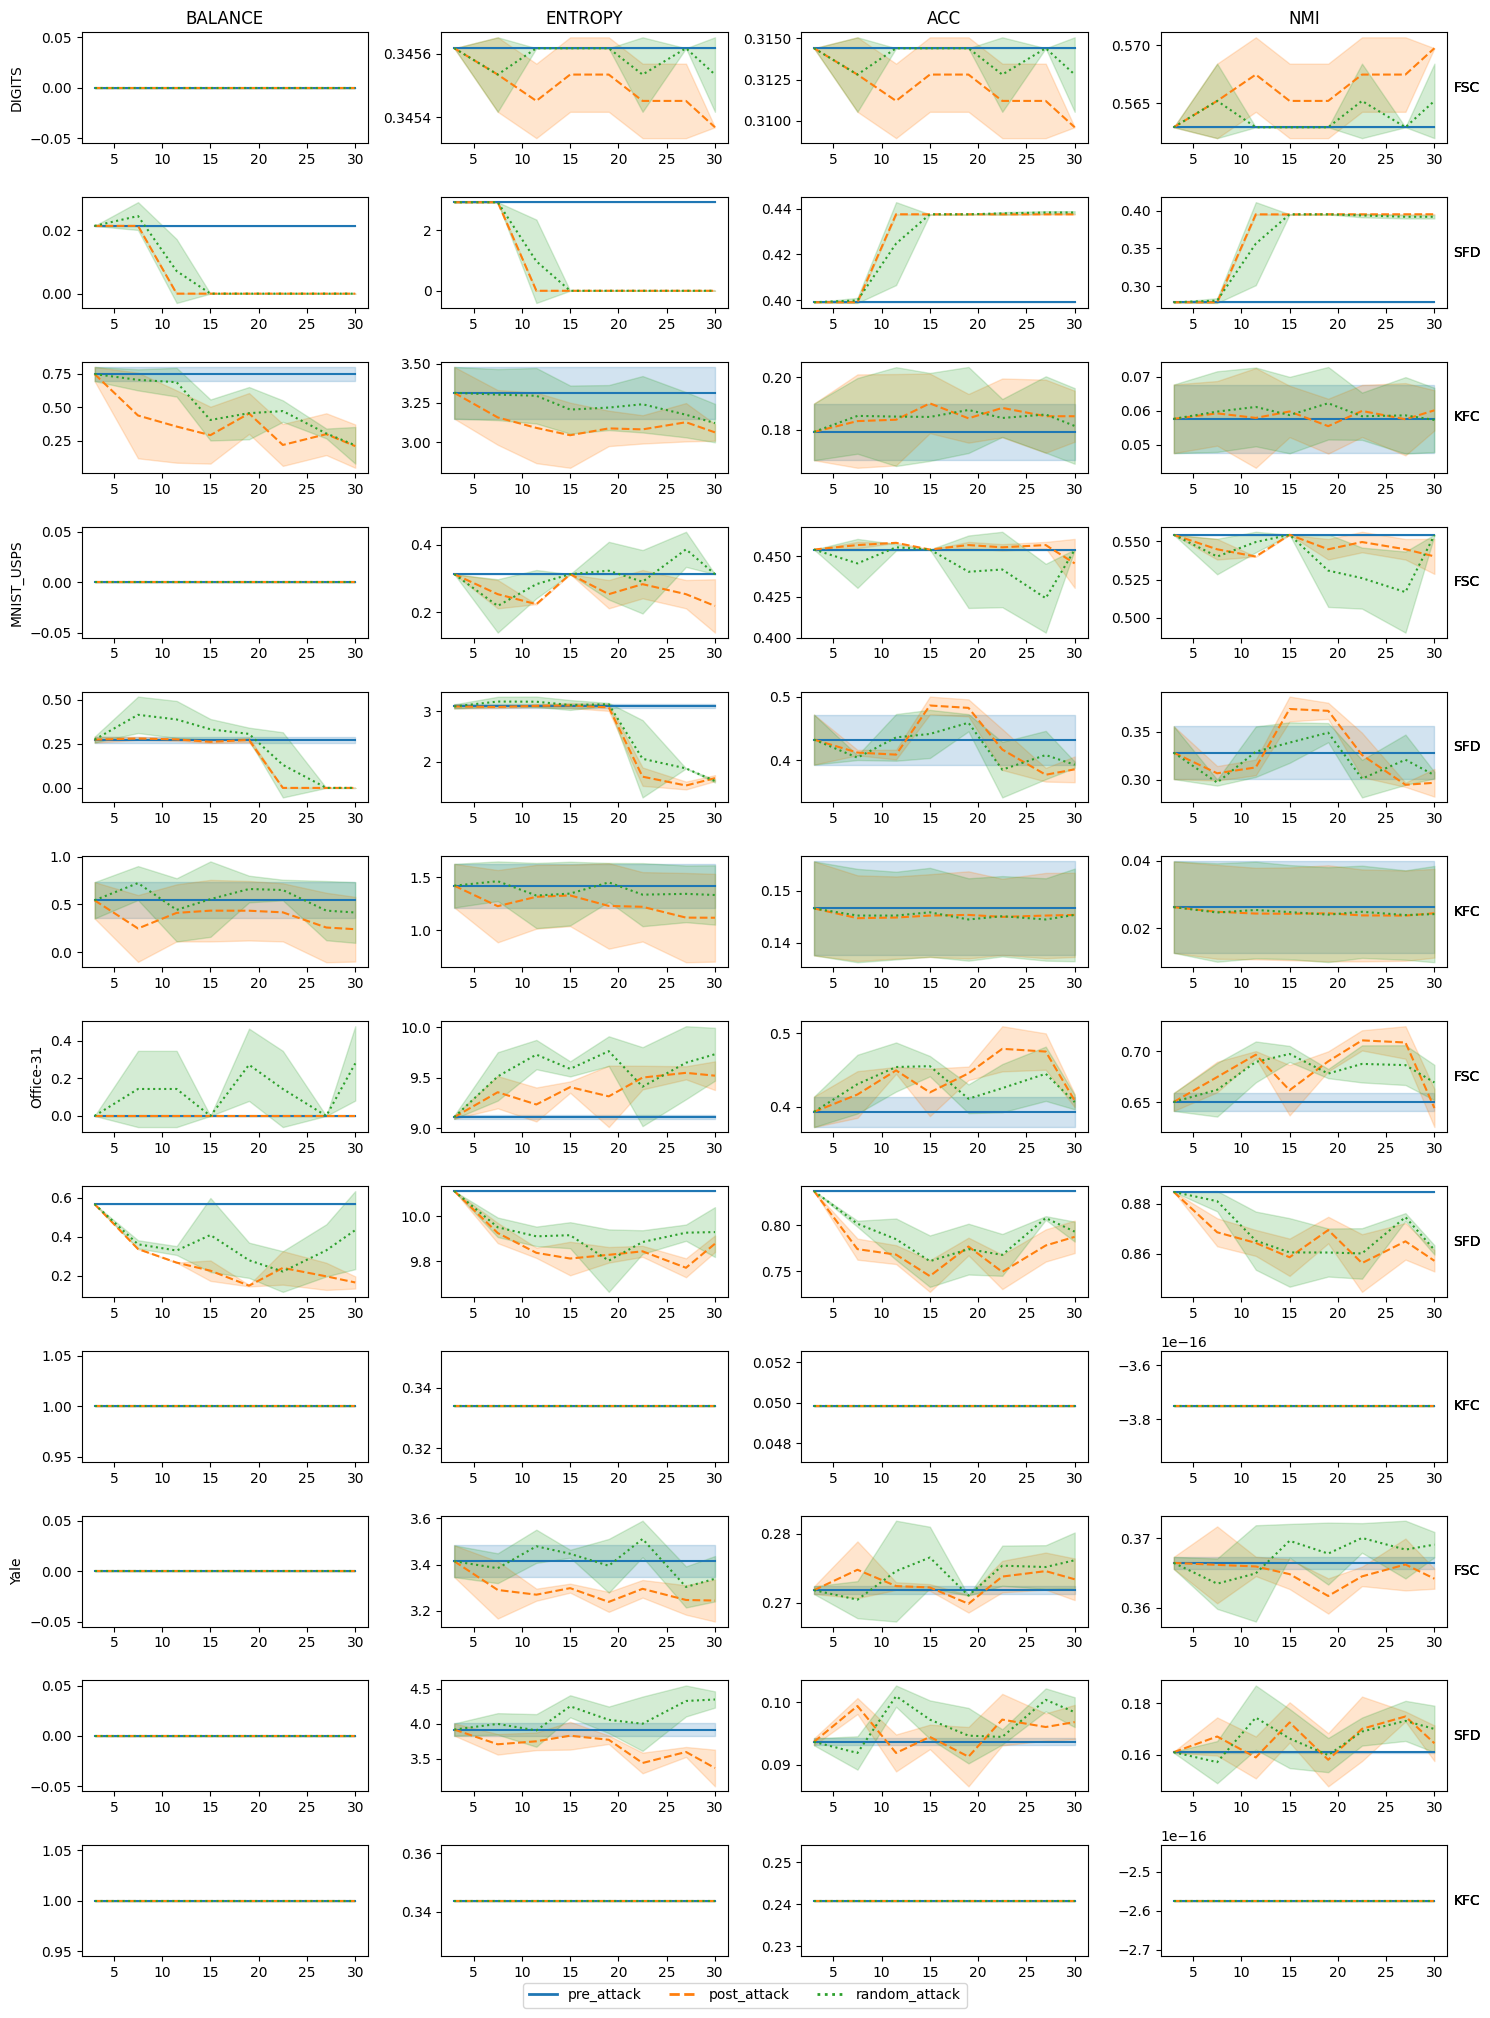

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Unique datasets and metrics
datasets = ['DIGITS', 'MNIST_USPS', 'Office-31', 'Yale']
subdirs = ['FSC', 'SFD', 'KFC']
metrics = ['BALANCE', 'ENTROPY', 'ACC', 'NMI']
attacks = ['pre_attack', 'post_attack', 'random_attack']

line_styles = ['-', '--', ':']

fig, axs = plt.subplots(len(datasets)*len(subdirs), len(metrics), figsize=(15, 20))  # Create a grid of rows and columns
axs = axs.flatten()  # Flatten the array of axes to make it easier to iterate over
cmap = plt.cm.get_cmap('tab10')  # Get a colormap

for i, dataset in enumerate(datasets):
    for j, subdir in enumerate(subdirs):
        for k, metric in enumerate(metrics):
            ax = axs[i*len(subdirs)*len(metrics) + j*len(metrics) + k]  # Select the current axis
            for l, attack in enumerate(attacks):
                # Filter keys for current dataset and subdir
                key = f"{dataset}_{subdir}_{attack}"
                if key in mean_std_data:
                    value = mean_std_data[key]

                    means = [entry[metric]['mean'] for entry in value.values()]  # Extract means
                    stds = [entry[metric]['std'] for entry in value.values()]  # Extract standard deviations
                    x = list(mean_std_data[key].keys())
                    color = cmap(l)  # Get the color for the current line
                    ax.plot(x, means, line_styles[l], color=color, label=attack)
                    ax.fill_between(x, [m - s for m, s in zip(means, stds)], [m + s for m, s in zip(means, stds)], color=color, alpha=0.2)

                if j == 0 and k == 0:  # Set the dataset as the y label only for the first subplot of each dataset
                    ax.set_ylabel(dataset)
                if i == 0 and j == 0:
                    ax.set_title(metric)
                if k == len(metrics) - 1:  # If it's the last metric, add the algorithm on the right side
                    ax.text(1.02, 0.5, subdir, transform=ax.transAxes, va='center')

lines = [Line2D([0], [0], color=cmap(i), linewidth=2, linestyle=line_styles[i]) for i in range(len(attacks))]
fig.legend(lines, attacks, loc='lower center', ncol=len(attacks), bbox_to_anchor=(0.5, -0.01))
plt.tight_layout()
plt.show()

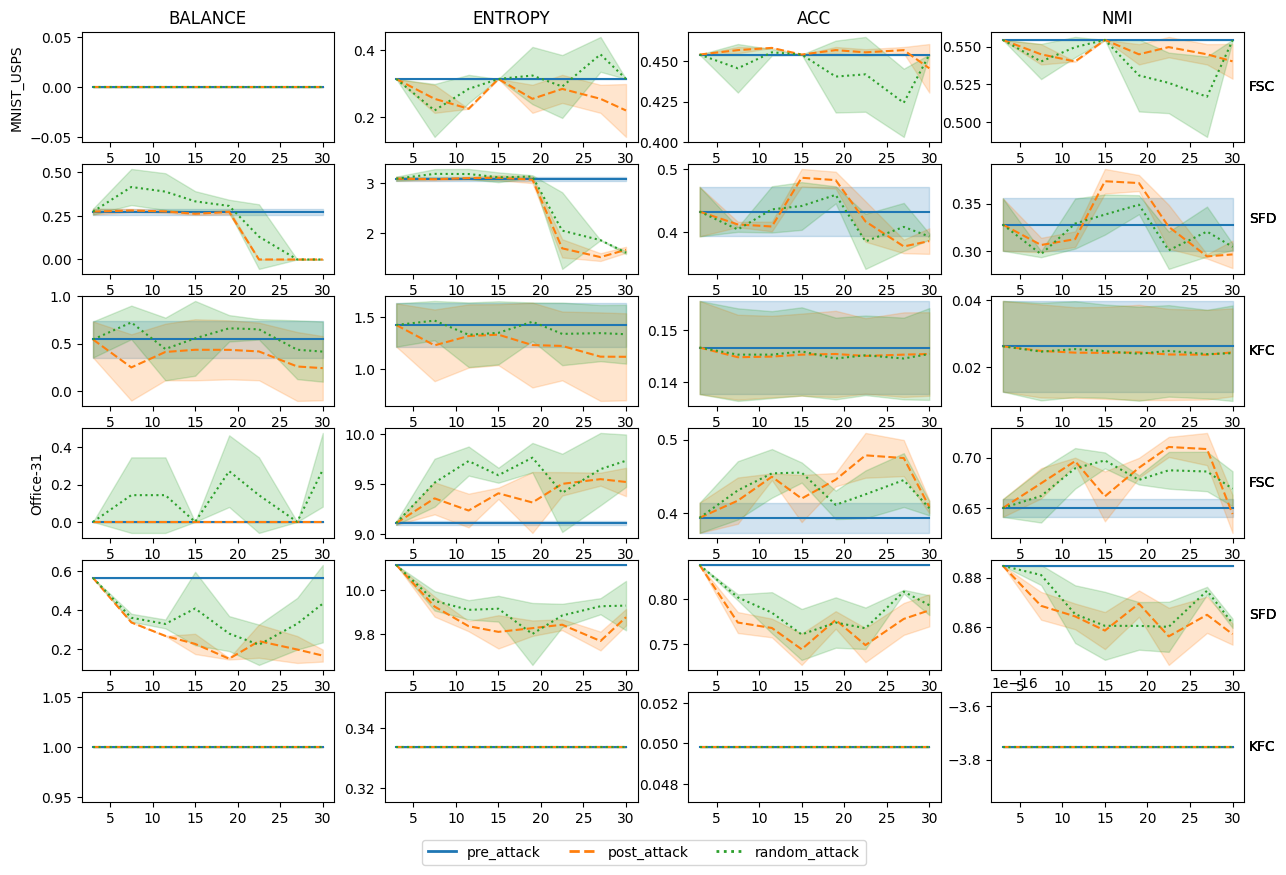

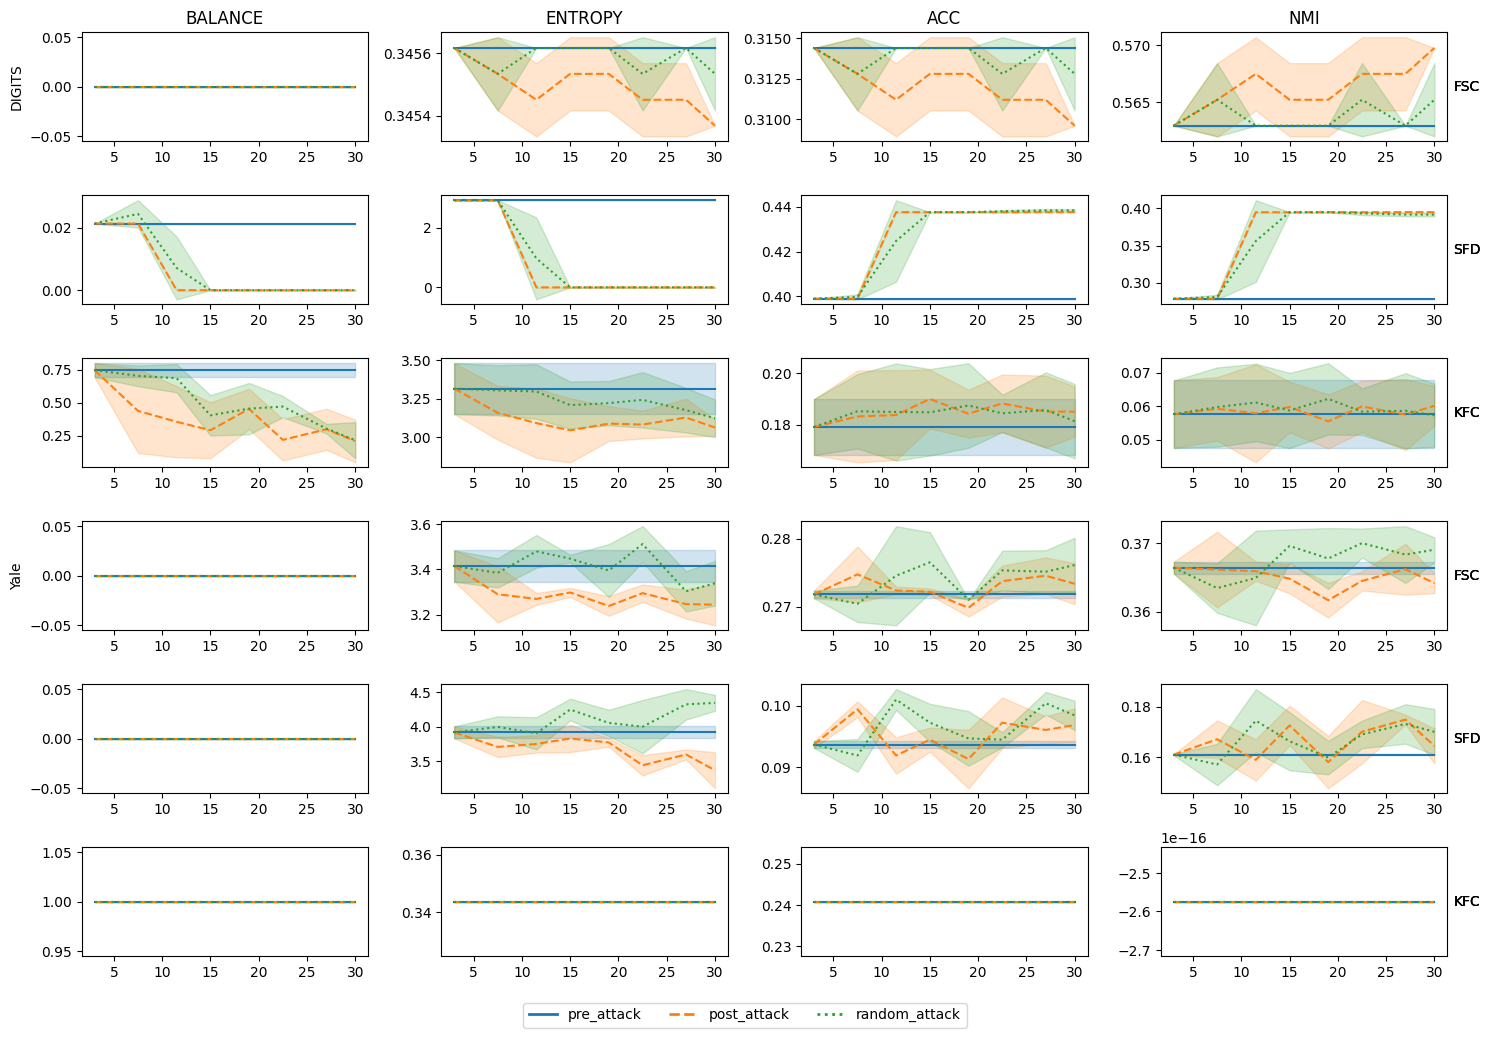

In [22]:
datasets1 = ['MNIST_USPS', 'Office-31']
datasets2 = ['DIGITS', 'Yale']

fig1, axs1 = plt.subplots(len(datasets1)*len(subdirs), len(metrics), figsize=(15, 10))  
axs1 = axs1.flatten() 

fig2, axs2 = plt.subplots(len(datasets2)*len(subdirs), len(metrics), figsize=(15, 10))  
axs2 = axs2.flatten() 

for i, dataset in enumerate(datasets1):
    for j, subdir in enumerate(subdirs):
        for k, metric in enumerate(metrics):
            ax = axs1[i*len(subdirs)*len(metrics) + j*len(metrics) + k]
            for l, attack in enumerate(attacks):
                # Filter keys for current dataset and subdir
                key = f"{dataset}_{subdir}_{attack}"
                if key in mean_std_data:
                    value = mean_std_data[key]

                    means = [entry[metric]['mean'] for entry in value.values()]  # Extract means
                    stds = [entry[metric]['std'] for entry in value.values()]  # Extract standard deviations
                    x = list(mean_std_data[key].keys())
                    color = cmap(l)  # Get the color for the current line
                    ax.plot(x, means, line_styles[l], color=color, label=attack)
                    ax.fill_between(x, [m - s for m, s in zip(means, stds)], [m + s for m, s in zip(means, stds)], color=color, alpha=0.2)

                if j == 0 and k == 0:  # Set the dataset as the y label only for the first subplot of each dataset
                    ax.set_ylabel(dataset)
                if i == 0 and j == 0:
                    ax.set_title(metric)
                if k == len(metrics) - 1:  # If it's the last metric, add the algorithm on the right side
                    ax.text(1.02, 0.5, subdir, transform=ax.transAxes, va='center')
for i, dataset in enumerate(datasets2):
    for j, subdir in enumerate(subdirs):
        for k, metric in enumerate(metrics):
            ax = axs2[i*len(subdirs)*len(metrics) + j*len(metrics) + k]
            for l, attack in enumerate(attacks):
                # Filter keys for current dataset and subdir
                key = f"{dataset}_{subdir}_{attack}"
                if key in mean_std_data:
                    value = mean_std_data[key]

                    means = [entry[metric]['mean'] for entry in value.values()]  # Extract means
                    stds = [entry[metric]['std'] for entry in value.values()]  # Extract standard deviations
                    x = list(mean_std_data[key].keys())
                    color = cmap(l)  # Get the color for the current line
                    ax.plot(x, means, line_styles[l], color=color, label=attack)
                    ax.fill_between(x, [m - s for m, s in zip(means, stds)], [m + s for m, s in zip(means, stds)], color=color, alpha=0.2)

                if j == 0 and k == 0:  # Set the dataset as the y label only for the first subplot of each dataset
                    ax.set_ylabel(dataset)
                if i == 0 and j == 0:
                    ax.set_title(metric)
                if k == len(metrics) - 1:  # If it's the last metric, add the algorithm on the right side
                    ax.text(1.02, 0.5, subdir, transform=ax.transAxes, va='center')

lines = [Line2D([0], [0], color=cmap(i), linewidth=2, linestyle=line_styles[i]) for i in range(len(attacks))]
fig1.legend(lines, attacks, loc='lower center', ncol=len(attacks), bbox_to_anchor=(0.5, 0.04))

lines = [Line2D([0], [0], color=cmap(i), linewidth=2, linestyle=line_styles[i]) for i in range(len(attacks))]
fig2.legend(lines, attacks, loc='lower center', ncol=len(attacks), bbox_to_anchor=(0.5, -0.04))

plt.tight_layout()
plt.show()